# 1. Basic Geospatial Concepts 

Learning Objectives: 
By the end of this section, students should be able to: 

1. Explain different types of spatial data, e.g., raster and vector, etc.
2. Explain what a coordinate reference system is

 
## 1.1 Geosptial Information Science/Systems (GIS) 

What is GIS? 

What can you do with GIS? 

Who can use GIS (possible character building here)?



## 1.2 GIS data

Vectors

Rasters

Coordinate reference systems/Projections 

File types: TIFF, JPEG, etc. 

Navigating GIS Maps(Common navigation tools): Legends, arrows, zoom-in/zoom-out



## 1.3 GIS Software

Earth Engine/Explorer
Grass GIS
Other common products: ArcGIS, etc. 

*add python intro here? 



#  2. Intro to satellite imagery 

Learning Objectives: 
By the end of this section, students should be able to: 

1. Describe the fundamental aspects of satellite imagery (bands, etc)
2. Describe the differences in a single band image and a multi-band image
3. Search for satellite imagery in *Earth Engine* [or] *Earth Explorer*
4. Import a set of images into a map
5. Choose the best quality images to use for analysis
6. Collect images for the same area over time (time series)


## 2.1 What is satellite imagery? 

Where do these images come from? 

Different satellites: LANDSAT vs Seninel-2 vs IKONOS, etc. 

What is in a satelite image: bands, wave lengths, resolution, etc. 


## 2.2 Finding and downloading satellite imagery in Earth Explorer 

Search critiera
Dates
Select satellite 
Finding good quality images 
Downloading and unzipping 

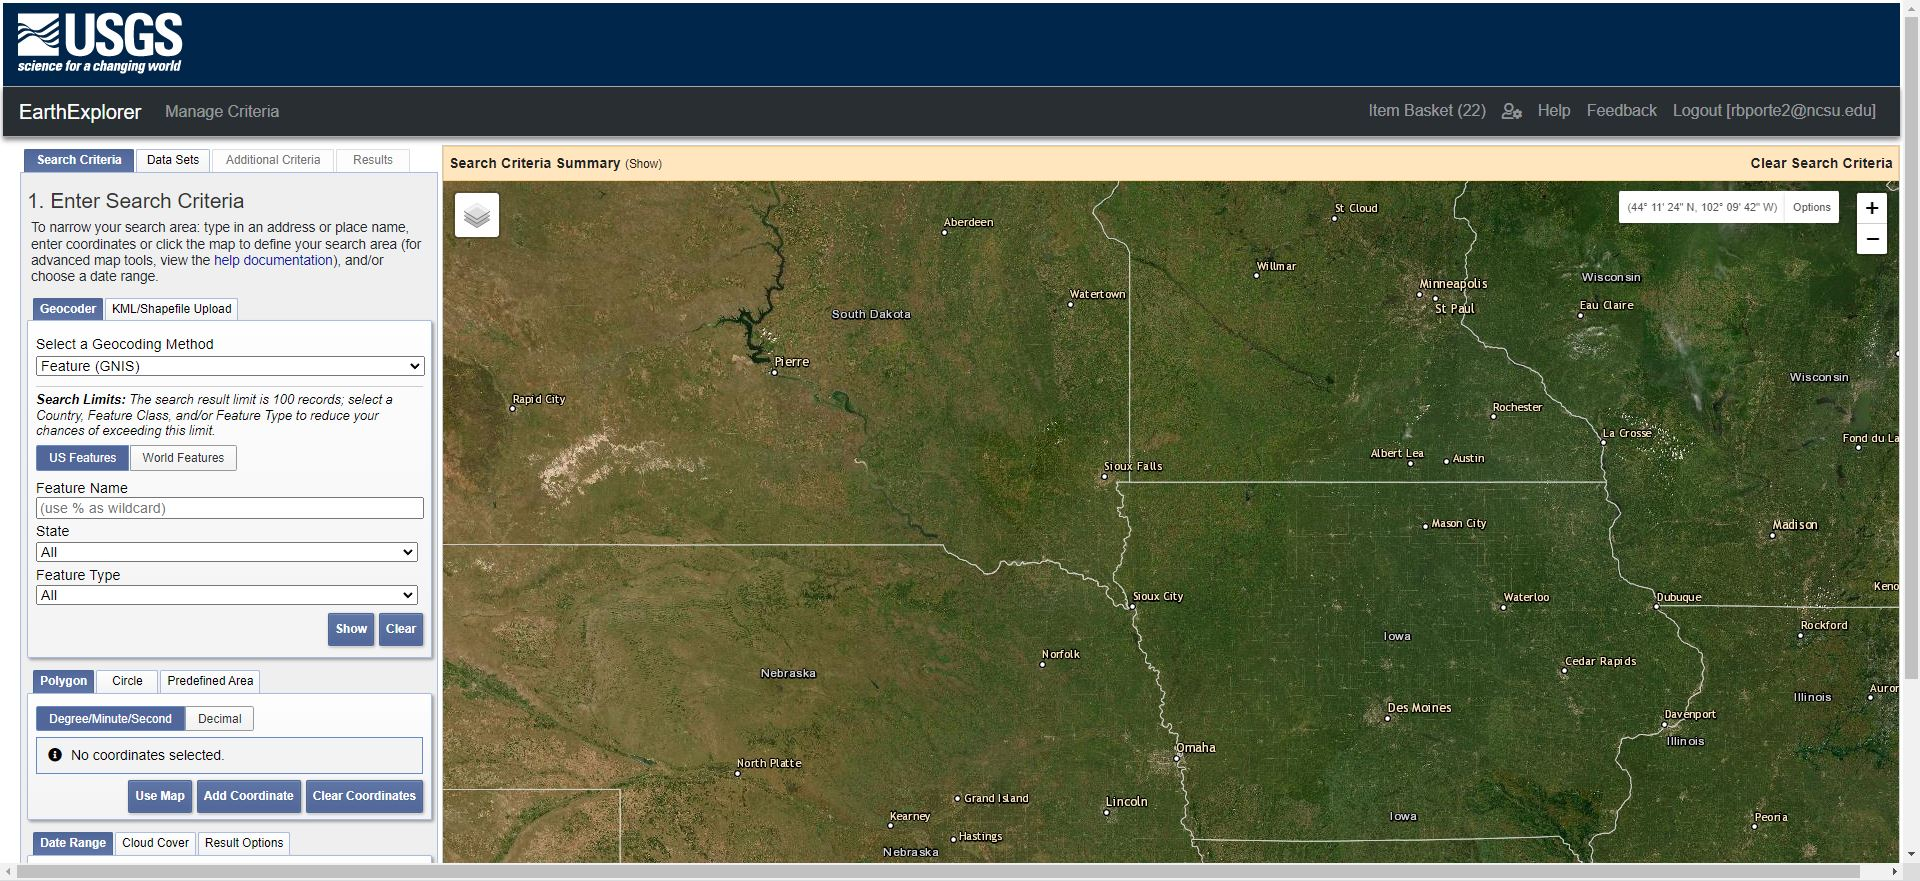


## 2.3 Displaying raster data and creating a multi-band image

open grass 
open python shell 
Copy and past the following code: 

> print("Hello you crazy world")

> d.rgb red=lsat7_2002_30 green=lsat7_2002_20 blue=lsat7_2002_10

> gscript.run_command('r.composite', red='lsat7_2002_30@PERMANENT', green='lsat7_2002_20@PERMANENT', blue='lsat7_2002_10@PERMANENT', output="testoutput5@DataExtensionTest1", overwrite=True)


#  3. Identifying spatial/temporal irregularitie 

Learning Objectives: 
By the end of this section, students should be able to: 
1. Analyze [visually] the spatial patterns across a map. 
2. Compare images across time.







# 4. Maps for analyzing plant health (NDVI)

Learning Objectives: 
By the end of this section, students should be able to: 
1. Explain what NDVI is
2. Calculate NDVI
3. Compare NDVI values across time-series data







# 5.  Addtional vegetative indices 

Learning Objectives: 
By the end of this section, students should be able to: 
1. Explain the different types of vegetative indices (VI)
2. Describe the potential applications of different VIs.
3. Discuss the limits of NDVI
4. Choose the VI index that’s most useful 




In [2]:
# Import Python standard library and IPython packages we need.
import os
import subprocess
import sys
import csv
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [7]:
# Ask GRASS GIS where its Python packages are.
# FOR WINDOWS:
# grass_call = "grass80"
# shell_setting = True
# FOR MAC/LINUX
grass_call = "grass80"
shell_setting = True

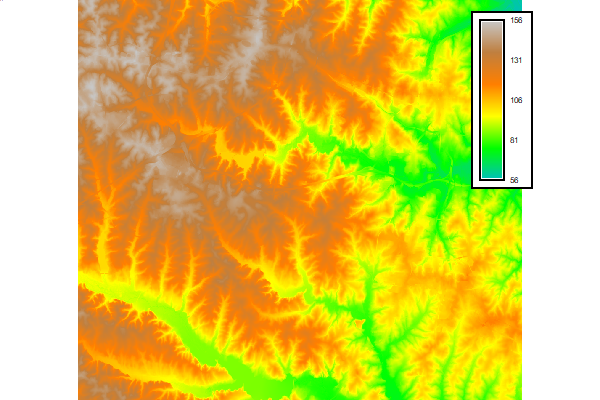

In [9]:
# Import Python standard library and IPython packages we need.
import os
import sys
import subprocess
from IPython.display import Image

# Ask GRASS GIS where its Python packages are.
grass_call = "grass80"
sys.path.append(
    subprocess.check_output([grass_call, "--config", "python_path"], text=True, shell=True).strip()
)

# Import the GRASS GIS packages we need.
import grass.script as gs
import grass.jupyter as gj

# Create a GRASS GIS session.
gj.init("./GIS714-assignments/data", "nc_spm_08_grass7", "user1")


# Set computational region to the study area.
gs.parse_command('g.region', raster="elevation", flags='pg')
# Set colors for elevation raster
gs.run_command('r.colors', map="elevation", color="elevation")

# Create GrassRenderer instance
img = gj.GrassRenderer()
# Add a raster, vector and legend to the map
img.d_rast(map="elevation")
img.d_legend(raster="elevation", at=(55, 95, 80, 84), flags="b")
# Display map
img.show()